<a href="https://colab.research.google.com/github/lujain618/Deepfake_Detection_With_XAI/blob/main/Copy_of_Faces_CNN_Shap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os, datetime

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model

from PIL import Image
import matplotlib.pyplot as plt

import pydotplus
import pydot

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

real_path = "/content/drive/MyDrive/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/test/real"
fake_path = "/content/drive/MyDrive/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/test/fake"

real_images = os.listdir(real_path)
fake_images = os.listdir(fake_path)

print("Number of TEST real face images:", len(real_images))
print("Number of TEST fake face images:", len(fake_images))


Number of TEST real face images: 10000
Number of TEST fake face images: 10000


In [ ]:

real_path = "/content/drive/MyDrive/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/valid/real"
fake_path = "/content/drive/MyDrive/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/valid/fake"

real_images = os.listdir(real_path)
fake_images = os.listdir(fake_path)

print("Number of VALID real face images:", len(real_images))
print("Number of VALID fake face images:", len(fake_images))


Number of VALID real face images: 10000
Number of VALID fake face images: 10000


In [ ]:

real_path = "/content/drive/MyDrive/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/train/real"
fake_path = "/content/drive/MyDrive/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/train/fake"

real_images = os.listdir(real_path)
fake_images = os.listdir(fake_path)

print("Number of TRAIN real face images:", len(real_images))
print("Number of TRAIN fake face images:", len(fake_images))


Number of TRAIN real face images: 50000
Number of TRAIN fake face images: 50000


In [3]:
base_dir = "/content/drive/MyDrive/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/"
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
valid_dir = os.path.join(base_dir, 'valid')

In [4]:
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen = ImageDataGenerator( rescale = 1.0/255. )
valid_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [7]:
train_generator = train_datagen.flow_from_directory(train_dir, batch_size=32, class_mode='binary', target_size=(150, 150))

validation_generator = valid_datagen.flow_from_directory(valid_dir, batch_size=32, class_mode='binary', target_size=(150, 150))

test_generator = test_datagen.flow_from_directory(test_dir, batch_size=32, class_mode='binary', target_size=(150, 150))

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [8]:
model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Flatten(),

     tf.keras.layers.Dense(1064, activation='relu'),
     tf.keras.layers.Dense(2, activation='softmax')
    ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
tf.keras.utils.pydot = pydot


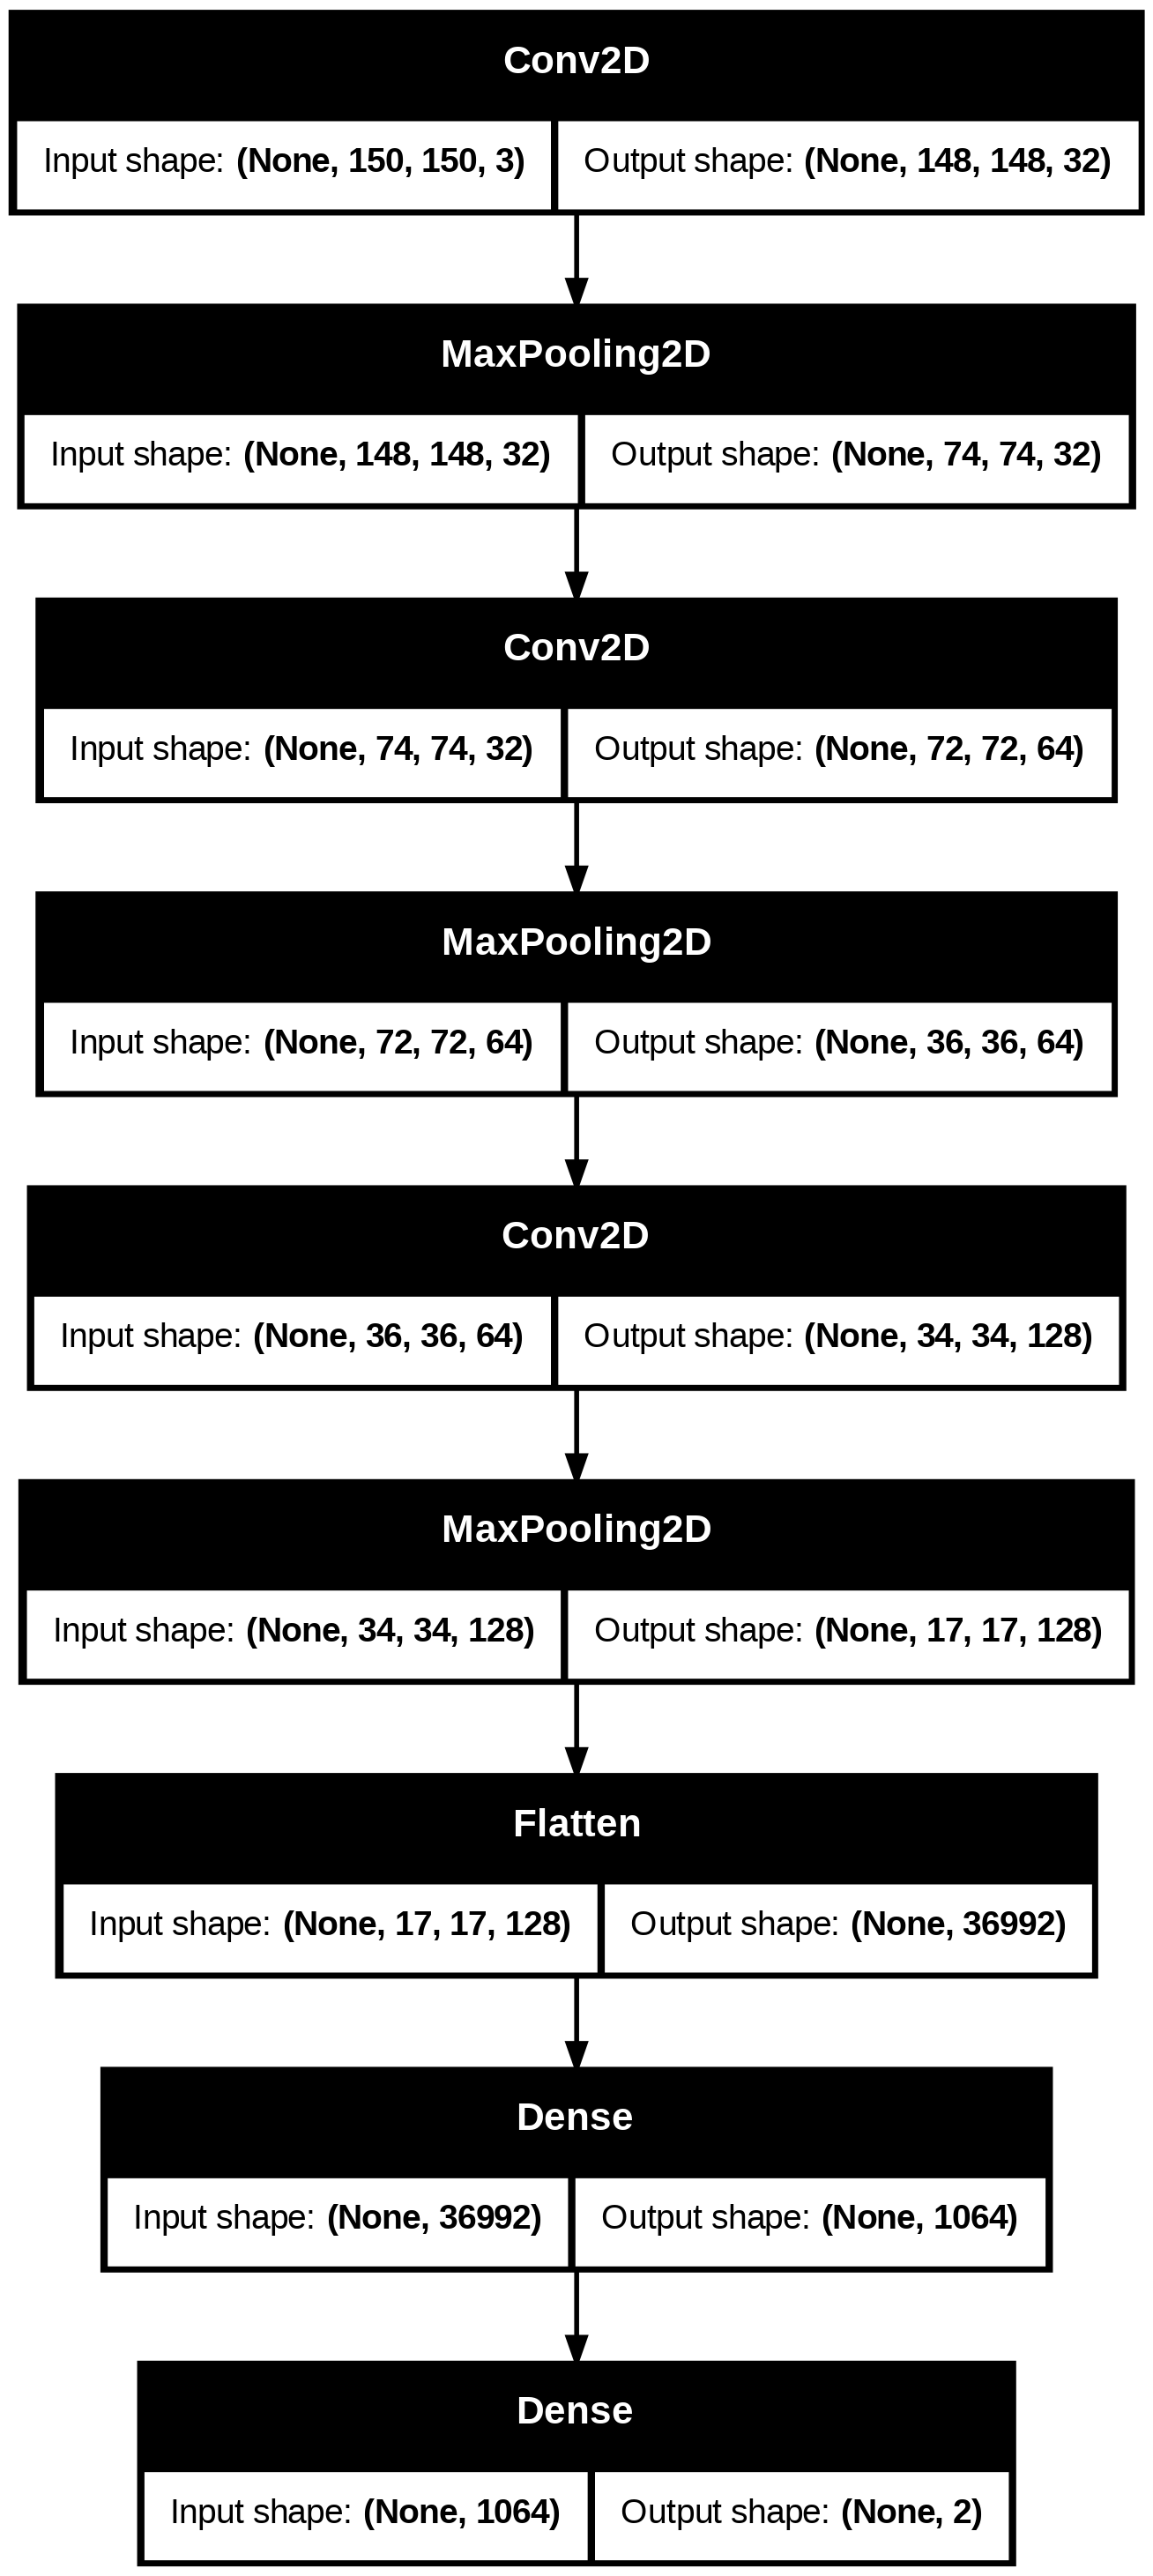

In [10]:
plot_model(model, to_file='model.png', show_shapes=True)


In [11]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1064)                │      39,360,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           2,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 39,455,930 (150.51 MB)

 Trainable params: 39,455,930 (150.51 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])


In [13]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6, verbose=1)

In [14]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=100,
    validation_steps=20,
    epochs=15,
    callbacks=[early_stop, reduce_lr]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 2627s 26s/step - accuracy: 0.5166 - loss: 0.8889 - val_accuracy: 0.5516 - val_loss: 0.6868 - learning_rate: 0.0010
Epoch 2/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 2456s 25s/step - accuracy: 0.5713 - loss: 0.6860 - val_accuracy: 0.6000 - val_loss: 0.6643 - learning_rate: 0.0010
Epoch 3/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 2313s 23s/step - accuracy: 0.5998 - loss: 0.6661 - val_accuracy: 0.5969 - val_loss: 0.6598 - learning_rate: 0.0010
Epoch 4/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 2108s 21s/step - accuracy: 0.6471 - loss: 0.6457 - val_accuracy: 0.6297 - val_loss: 0.6386 - learning_rate: 0.0010
Epoch 5/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 1945s 20s/step - accuracy: 0.6596 - loss: 0.6222 - val_accuracy: 0.6672 - val_loss: 0.6110 - learning_rate: 0.0010
Epoch 6/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 1895s 19s/step - accuracy: 0.6664 - loss: 0.6224 - val_accuracy: 0.6703 - val_loss: 0.5876 - learning_rate: 0.0010
Epoch 7/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 1857s 19s/step - accuracy: 0.6

In [16]:
%%model.save("/content/drive/MyDrive/Model-CNN.h5")


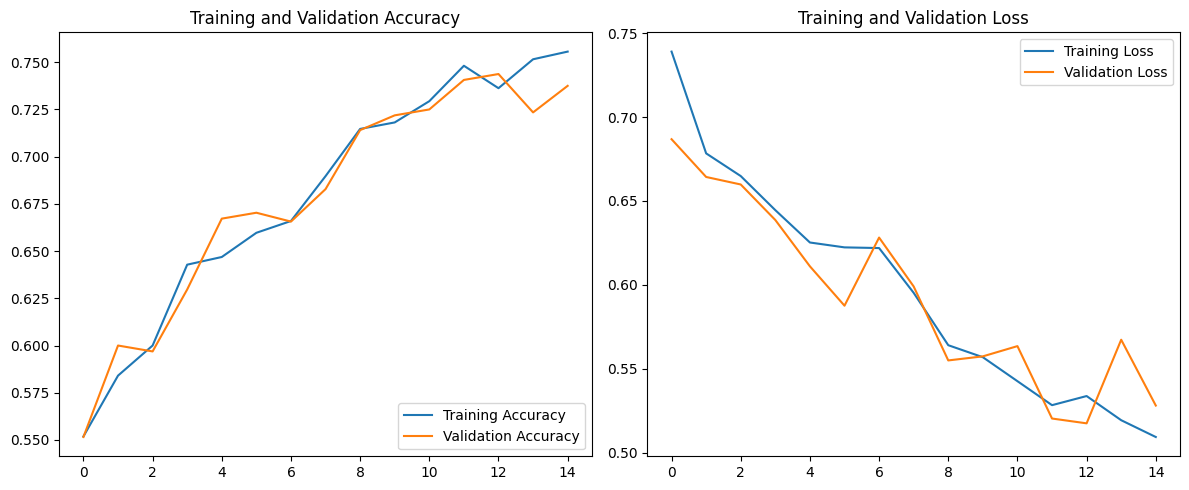

In [19]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()


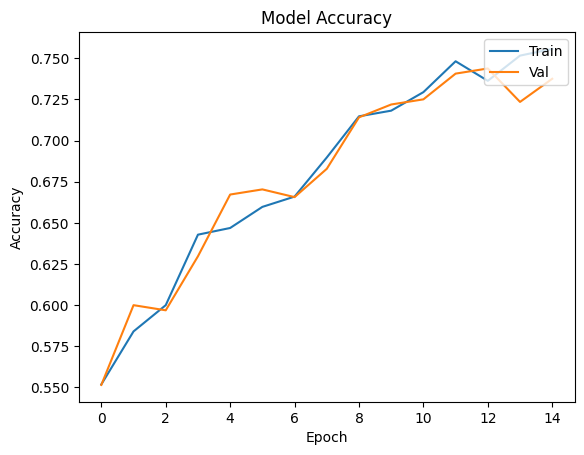

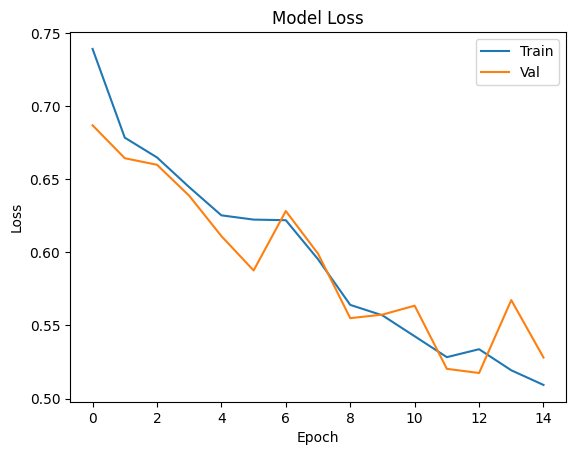

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

 SHAP explanation code

In [23]:
import shap
import numpy as np

# Select a small batch of training images to use as background (reference data)
x_batch, y_batch = next(train_generator)  # Take one batch from the generator
background = x_batch[:10]  # You can reduce this number if your device is slow


In [24]:

# Create a SHAP explainer (only works with TensorFlow/Keras models)
explainer = shap.DeepExplainer(model, background)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(10, 150, 150, 3))']
  warnings.warn(msg)


In [25]:

# Select new images to explain (e.g., the next 5 images in the batch)
test_images = x_batch[10:15]

In [26]:
# Calculate SHAP values (explanation values) for the test images
shap_values = explainer.shap_values(test_images)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(20, 150, 150, 3))']
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(5, 150, 150, 3))']
  warnings.warn(msg)


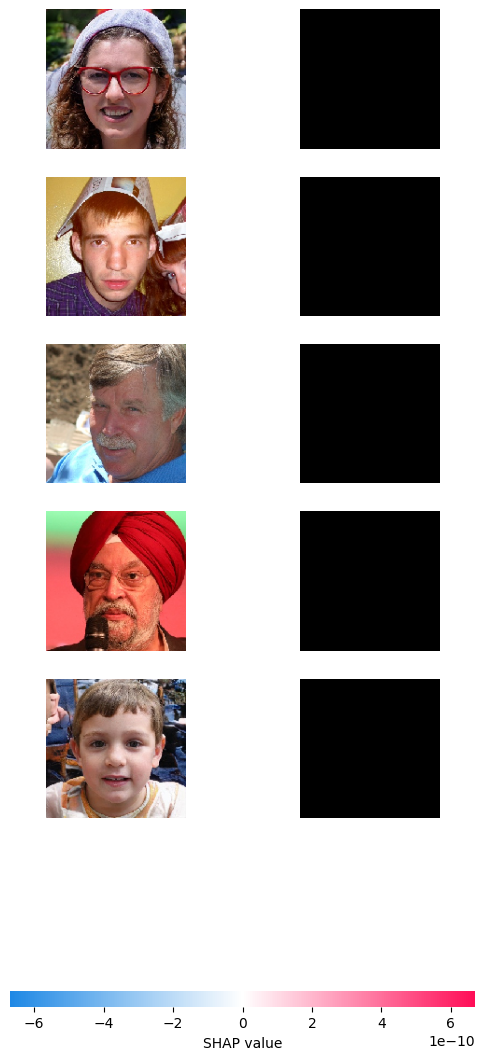

In [27]:
# Display the test images along with their SHAP explanations
shap.image_plot(shap_values, test_images)